In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Data
crimes_data = pd.read_csv('./datasets/CrimeLA.csv', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC':str})
#print(crimes_data.info())

12 is the peak hour for crime in LA


[]

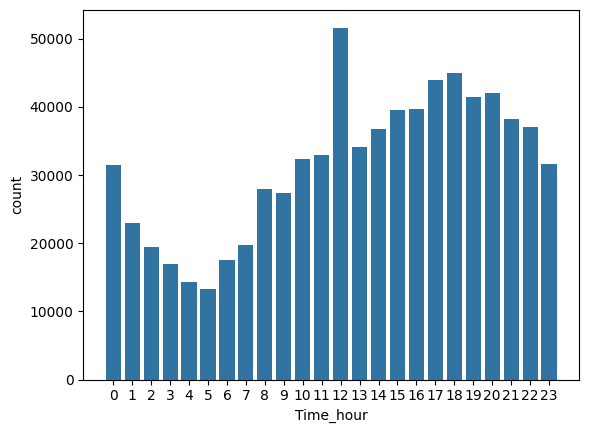

In [28]:
# Hour with the highest Frequency of Crimes
crimes_data['Time_hour'] = crimes_data['TIME OCC'].str[:2].astype(int)
crime_hour_freq = crimes_data['Time_hour'].value_counts()
print(str(crime_hour_freq.index[0]) + " is the peak hour for crime in LA")
peak_crime_hour = 12

sns.countplot(data=crimes_data, x='Time_hour')
plt.plot()

The area with the highest frequency of night crime is Central with 11194 crimes


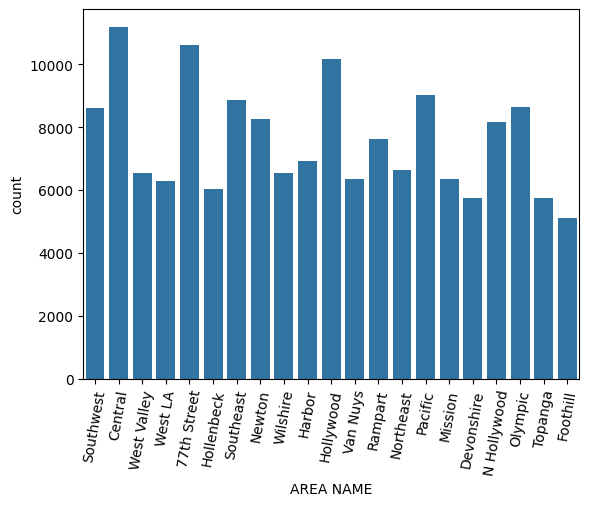

In [29]:
# Area with the largest frequency of night crimes (crimes committed between 10pm and 3:59am)
night_time = crimes_data['Time_hour'].isin([22,23,24,0,1,2,3])
night_crime = crimes_data[night_time]

night_crime_count = night_crime.groupby(by='AREA NAME', as_index=False)['Time_hour'].count().sort_values('Time_hour', ascending=False)
peak_night_crime_location = night_crime_count['AREA NAME'].iloc[0]
peak_time = night_crime_count['Time_hour'].iloc[0]

print(f'The area with the highest frequency of night crime is '+ peak_night_crime_location + ' with '+ str(peak_time) + ' crimes')

sns.countplot(data=night_crime, x='AREA NAME')
plt.xticks(rotation=80)
plt.show()

In [33]:
# Crimes committed against victims of different age groups
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ['0-17','18-25','26-34','35-44','45-54','55-64','65+']

crimes_data['Age_bracket'] = pd.cut(x=crimes_data['Vict Age'], bins=age_bins, labels=age_labels)
victim_ages = crimes_data['Age_bracket'].value_counts().sort_index()

print(victim_ages)

Age_bracket
0-17      19955
18-25     87493
26-34    144370
35-44    126064
45-54     88455
55-64     63120
65+       42767
Name: count, dtype: int64
